<a href="https://colab.research.google.com/github/innosevda/Data-Science-CRN-20018/blob/main/homework8v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1 (40 pt)

A sample of 30 respondents was interviewed using mall intercept interviewing. The respondents were asked to indicate their degree of agreement with the following statements using a seven-point scale (1 = strongly disagree, 7 = strongly agree).

•	V1 = It is important to buy a toothpaste that prevents cavities

•	V2 = I like a toothpaste that gives a shiny teeth

•	V3 = A toothpaste should strengthen your gums teeth

•	V4 = I prefer a toothpaste that freshens breath

•	V5 = Prevention of tooth decay is not an important benefit offered by a toothpaste

•	V6 = The most important consideration in buying a toothpaste is attractive teeth

By using the variables,

(1) How many factors is extracted from data for principal component analysis?

(2) What is the total percentage of variance explained by these principal components?

(3)Which variables are included in the same factors ? How can you name these factors?

You can find the data at

https://raw.githubusercontent.com/ogut77/DataScience/main/data/Toothpaste.csv

In [ ]:
# Q1

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/ogut77/DataScience/main/data/Toothpaste.csv")

df.head()


,V1,V2,V3,V4,V5,V6
0,7.0,3.0,6.0,4.0,2.0,4.0
1,1.0,3.0,2.0,4.0,5.0,4.0
2,6.0,2.0,7.0,4.0,1.0,3.0
3,4.0,5.0,4.0,6.0,6.0,5.0
4,1.0,2.0,2.0,3.0,2.0,2.0


In [ ]:
# PCA needs the data to be standardized (mean=0, std=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [ ]:
# Applying PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative variance:", pca.explained_variance_ratio_.cumsum())


Explained variance ratio: [0.39747021 0.30295205 0.16145572 0.07131525 0.05138315 0.01542362]
Cumulative variance: [0.39747021 0.70042226 0.86187798 0.93319323 0.98457638 1.        ]


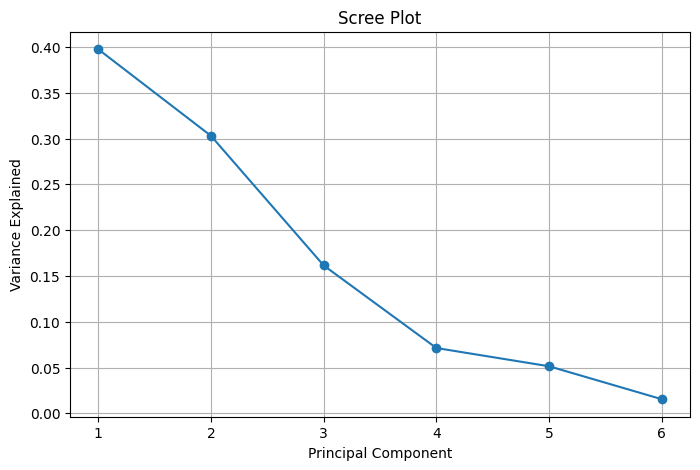

In [ ]:
# Ploting the Scree Plot
# helps to visualize how many components to keep

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

In [ ]:
# Loading tells us which variables belong to which component

loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(len(df.columns))],
                        index=df.columns)

print(loadings)

         PC1       PC2       PC3       PC4       PC5       PC6
V1 -0.300180  0.614344  0.183474  0.105313 -0.277200 -0.640999
V2  0.503715  0.263534  0.084629 -0.695009 -0.418370  0.107646
V3 -0.363633  0.570766  0.194627 -0.038606  0.200211  0.680105
V4  0.526215  0.210514  0.044580  0.709880 -0.344015  0.233493
V5  0.158218 -0.195328  0.940028  0.012959  0.214732 -0.082966
V6  0.471167  0.380642 -0.188827 -0.016849  0.737283 -0.231489


###Question 1:
PC1 and PC2 explain the most variance (especially PC1 ~40%, PC2 ~30%). After PC3, the variance drops sharply.
2 or 3 components can be extracted (most likely 3, since PC3 still explains ~16%).

###Question 2:
Explained Variance Ratio (Individual Components):

PC1: 39.7%

PC2: 30.3%

PC3: 16.1%

PC4: 7.1%

PC5: 5.1%

PC6: 1.5%

The total percentage of variance explained by these 3 components (PC1, PC2, PC3) is approximately: 86.2%


###Question 3:

Using loadings table,
most positive loadings for PC1 are V2, V4, V6. These are about attractive teeth, fresh breath, and aesthetic concerns. So we name PC1: Aesthetic/Appearance-Oriented

Most positive loadings for PC2 are V1, V3, V6, which are are about gum health, cavity prevention, and overall oral health. So we name PC2: Health-Oriented

For PC3, highest loading is V5, which is reverse-worded: "Prevention of tooth decay is not an important benefit offered by a toothpaste". We can name PC3: Tooth Decay Importance Attitude.


In [1]:
#Q2 and Q3 is below
# Data description is provided below

import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [2]:
 #There are missing values in the Lead data .
# Replace missing variables with the mean  if variable is numeric or mode if variable is categorical.
for col in df.columns:
    if ((df[col].dtype == 'float64') or (df[col].dtype == 'float64')) :
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


In [2]:
#Check that there are no missing data
df.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,36
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,137
Total Time Spent on Website,0
Page Views Per Visit,137


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



df = df.drop(columns=['Prospect ID','Lead Number'])
y = df['Converted']
X = df.drop(columns=['Converted'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [4]:
def eval(yact,ypred):
 from sklearn import metrics
 print("Accuracy:",metrics.accuracy_score(yact, ypred))
 print("Precision:",metrics.precision_score(yact, ypred))
 print("Recall:",metrics.recall_score(yact, ypred))

 cnf_matrix = metrics.confusion_matrix(yact, ypred)
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 %matplotlib inline
 class_names=[0,1] # name  of classes
 fig, ax = plt.subplots()
 tick_marks = np.arange(len(class_names))
 plt.xticks(tick_marks, class_names)
 plt.yticks(tick_marks, class_names)
 # create heatmap
 sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
 ax.xaxis.set_label_position("top")
 plt.tight_layout()
 plt.title('Confusion matrix', y=1.1)
 plt.ylabel('Actual label')
 plt.xlabel('Predicted label')


In [ ]:
#Q2(30 pt)-Using pycaret AutoML tools,make prediction on test data and evaluate performance of prediction using eval function defined above.

In [7]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 813.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 112.7 MB/s eta 0:00:00
   ━━━

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9361,0.9814,0.9097,0.9235,0.9165,0.8648,0.8650,1.4800
xgboost,Extreme Gradient Boosting,0.9355,0.9797,0.9109,0.9210,0.9159,0.8636,0.8637,1.1880
gbc,Gradient Boosting Classifier,0.9327,0.9805,0.8997,0.9238,0.9116,0.8573,0.8576,2.3520
rf,Random Forest Classifier,0.9306,0.9763,0.8901,0.9271,0.9081,0.8524,0.8530,1.6300
et,Extra Trees Classifier,0.9269,0.9730,0.8877,0.9201,0.9034,0.8446,0.8451,1.8020
lr,Logistic Regression,0.9250,0.9754,0.8913,0.9122,0.9016,0.8410,0.8412,3.1060
ada,Ada Boost Classifier,0.9246,0.9750,0.8925,0.9102,0.9012,0.8402,0.8404,1.2830
ridge,Ridge Classifier,0.9242,0.9738,0.8825,0.9179,0.8998,0.8389,0.8394,0.7010
lda,Linear Discriminant Analysis,0.9239,0.9732,0.8833,0.9165,0.8995,0.8383,0.8388,0.8290
dt,Decision Tree Classifier,0.9094,0.9065,0.8865,0.8799,0.8830,0.8091,0.8093,0.8380


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Accuracy: 0.9686147186147186
Precision: 0.9707317073170731
Recall: 0.9458174904942965


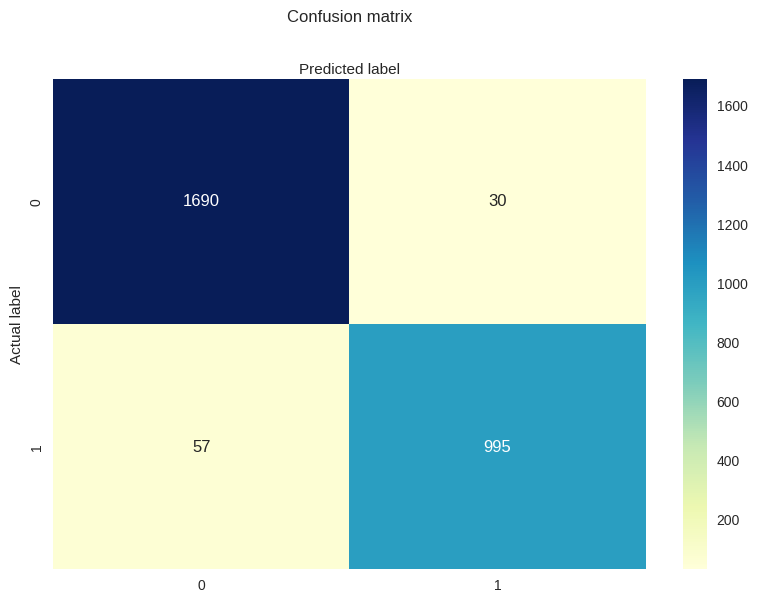

In [6]:
from pycaret.classification import *

# Combine features and target again
df_model = X.copy()
df_model['Converted'] = y

# Setup PyCaret (silent=True is removed in v3+)
clf1 = setup(data=df_model, target='Converted', session_id=123, verbose=False)

# Compare all models
best_model = compare_models()

# Finalize the best model
final_model = finalize_model(best_model)

# Predict on test data
X_test_copy = X_test.copy()
preds = predict_model(final_model, data=X_test)

# Evaluate
eval(y_test, preds['prediction_label'])

In [ ]:
#Q3(30 pt)-Using Autogluon  AutoML tools,make prediction on test data and evaluate performance of prediction using eval function defined above.

In [8]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort th

No path specified. Models will be saved in: "AutogluonModels/ag-20250429_172723"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.34 GB / 12.67 GB (89.5%)
Disk Space Avail:   61.28 GB / 107.72 GB (56.9%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

Accuracy: 0.9487734487734488
Precision: 0.9457142857142857
Recall: 0.9211502782931354


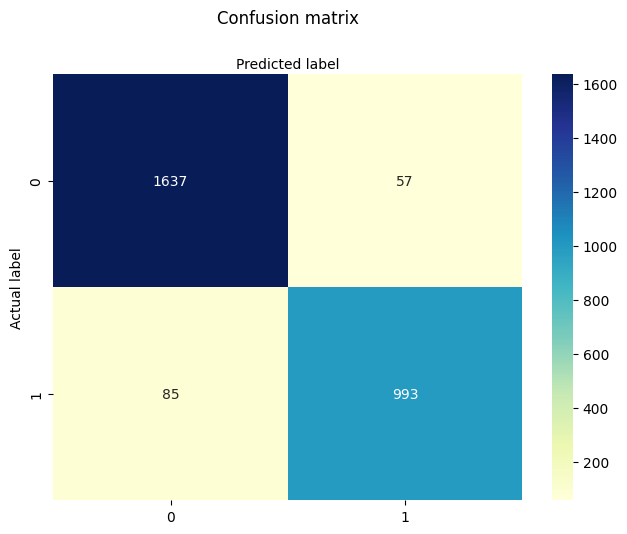

In [5]:
from autogluon.tabular import TabularPredictor
import pandas as pd

# Prepare training and testing data
train_data = X_train.copy()
train_data['Converted'] = y_train

test_data = X_test.copy()
test_data['Converted'] = y_test

# Train AutoGluon model
predictor = TabularPredictor(label='Converted').fit(train_data)

# Make predictions
preds = predictor.predict(test_data.drop(columns=['Converted']))

# Evaluate
eval(y_test, preds)